<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Python: Scripting
Caderno de **Aula**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Instalando o Python na própria máquina;</li>
  <li>Executando código Python no terminal;</li>
  <li>Criando arquivos de script Python.</li>
</ol>

---

# **Aulas**

## 1\. Instalando o Python na própria máquina

### **1.1. Google Colab**

Python e o PIP já vem instalado na máquina virtual provisionada.

**Exemplo:** Conferir a versão do Python via Python.

In [1]:
import platform

In [2]:
print(platform.python_version())

3.10.12


In [3]:
print(platform.system())

Linux


**Exemplo:** Conferir a versão do Python via Bash (linguagem nativa do Linux).

In [4]:
!python -V

Python 3.10.12


**Exemplo:** Conferir a versão do PIP via Bash (linguagem nativa do Linux).

In [5]:
!pip -V

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


### **1.2. Máquina Local**

Verifique se você já tem o Python e o PIP instalado na sua máquina. Para verificar a instalação, abrir o terminal (windows `cmd` ou linux/macos `terminal`) e executar o seguinte comando.

```shell
python -V
pip -V
```

Se não o tiver instalado, acessar o site oficial do Python ([link](https://www.python.org/)) e instalar o software para o seu sistema operacional. Um excelente tutorial se encontra neste [link](https://realpython.com/installing-python/). Para verificar a instalação, abrir o terminal (windows `cmd` ou linux/mcos `terminal`) e executar o seguinte comando.

```shell
python -V
pip -V
```

## 2\. Executando código Python no terminal

### **2.1. Google Colab**

O software do Python já vem "aberto" para ser utilizado.

In [ ]:
from datetime import datetime

print(datetime.now().year)

### **2.2. Máquina Local**



1.   Criar uma pasta (sugestão);
2.   Abrir o terminal nesta pasta (windows `shift + right click` ou linux/macos `right click`);
3.   Executar o seguinte comando:

```shell
python
```

Para 'sair' do Python, basta fechar o terminal ou digitar o seguinte código:

```shell
quit()
```

## 3\. Criando arquivos de script Python

### **3.1. Google Colab**

1. Criar um arquivo de *script* com a extensão `py` seguindo as boas práticas do PEP 8 ([link](https://www.python.org/dev/peps/pep-0008/));
2. Executar com o seguinte comando:

```shell
!python arquivo.py
```

**Exemplo:** *Script* para extrair a taxa CDI do site da B3.

In [13]:
import os
import json
from datetime import datetime

import requests

URL = 'https://www2.cetip.com.br/ConsultarTaxaDi/ConsultarTaxaDICetip.aspx'

# Criando a variável data e hora

data_e_hora = datetime.now()
data = datetime.strftime(data_e_hora, '%Y/%m/%d')
hora = datetime.strftime(data_e_hora, '%H:%M:%S')

# Captando a taxa CDI do site da B3

try:
  response = requests.get(URL)
  response.raise_for_status()
except requests.HTTPError as exc:
  print("Dado não encontrado, continuando.")
  cdi = None
except Exception as exc:
  print("Erro, parando a execução.")
  raise exc
else:
  dado = json.loads(response.text)
  cdi = float(dado['taxa'].replace(',', '.'))

# Verificando se o arquivo "taxa-cdi.csv" existe

if os.path.exists('./taxa-cdi.csv') == False:

  with open(file='./taxa-cdi.csv', mode='w', encoding='utf8') as fp:
    fp.write('data,hora,taxa\n')

# Salvando dados no arquivo "taxa-cdi.csv"

with open(file='./taxa-cdi.csv', mode='a', encoding='utf8') as fp:
  fp.write(f'{data},{hora},{cdi}\n')

print("Sucesso")

Sucesso


Vamos criar o arquivo de *script* `extrair-cdi.py`.

In [19]:
!python extrair-cdi.py

Sucesso


**Exemplo:** Script com argumentos.

In [14]:
from sys import argv

print(argv)
print(type(argv))

['/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-6041b234-1f5c-40f9-adf6-9c6b692198b5.json']
<class 'list'>


Vamos criar o arquivo de *script* `args.py`.

In [15]:
!python args.py

python3: can't open file '/content/args.py': [Errno 2] No such file or directory


**Exemplo:** *Script* para gerar um grafico da taxa CDI do site da B3.

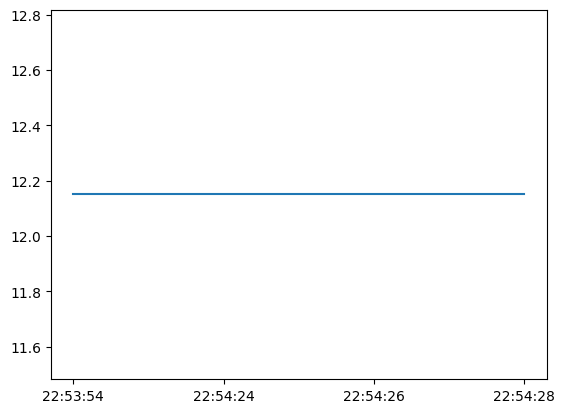

In [18]:
import csv
from sys import argv

import seaborn as sns

# Extraindo as colunas hora e taxa

horas = []
taxas = []

with open(file='./taxa-cdi.csv', mode='r', encoding='utf8') as fp:
  linha = fp.readline()
  linha = fp.readline()
  while linha:
    linha_separada = linha.split(sep=',')
    hora = linha_separada[1]
    horas.append(hora)
    taxa = float(linha_separada[2])
    taxas.append(taxa)
    linha = fp.readline()

# Salvando no grafico

grafico = sns.lineplot(x=horas, y=taxas)
grafico.get_figure().savefig(f"{argv[1]}.png")

Vamos criar o arquivo de *script* `cdi-grafico.py`.

In [20]:
!python cdi-grafico.py 'dia-10'

### **3.2. Máquina Local**

Mesma dinâmica!

### **3.3. Ferramenta de Desenvolvimento Local**

As IDEs (Integrated Development Environment) são ferramentas completas de desenvolvimento de código em software.

*   **PyCharm** da JetBrains ([link](https://www.jetbrains.com/));
*   **Visual Studio Code** da Microsoft ([link](https://code.visualstudio.com/)).

